<a href="https://colab.research.google.com/github/icculp/holbertonschool-machine_learning/blob/main/forecast_btc_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tensorflow as tf
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
import tensorflow as tf
#print(tf.version)
#print(tf.is_gpu_available())
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
coinbase = pd.read_csv('coinbase.csv')
coinbase.head()
#cb = coinbase[['Timestamp', 'Volume_(Currency)', 'Weighted_Price']]
#cb.head()

,Unnamed: 0,Timestamp,Volume_(Currency),Weighted_Price
0,0,1417411980,-0.256788,-0.775541
1,7,1417412400,-0.256788,-0.775541
2,51,1417415040,-0.256783,-0.757115
3,77,1417416600,-0.256739,-0.757115
4,1436,1417498140,-0.256783,-0.755273


In [6]:
defaults = [tf.int64, tf.int64, tf.float64, tf.float64]
data = tf.data.experimental.CsvDataset('coinbase.csv', record_defaults=defaults, header=True,)



In [7]:
weighted_price = coinbase['Weighted_Price'].values
weighted_price

array([-0.77554102, -0.77554102, -0.75711549, ...,  0.19995982,
        0.19988516,  0.1998919 ])

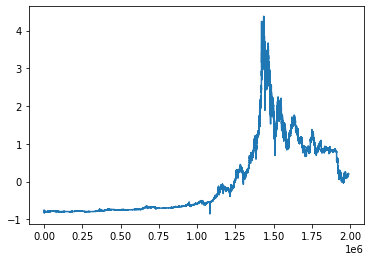

In [8]:
plt.plot(weighted_price)
plt.show()

In [40]:
length = len(weighted_price)
print(weighted_price.shape, length)
X_train = []
Y_train = []
X_test = []
for i in range(1000000, length - 10080):
    # print(i)
    X_train.append(weighted_price[i - 1440])
    Y_train.append(weighted_price[i])
for i in range(length - 10080, length):
    X_test.append(weighted_price[i])
X_train = np.array(X_train)#.reshape((-1, 1))
X_train = np.reshape(X_train, (X_train.shape[0], 1, 1))
Y_train = np.array(Y_train).reshape((-1, 1))
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], 1, 1)) # np.array(X_test).reshape((-1, 1))

(1990691,) 1990691


In [41]:
print("Xtrain", X_train.shape, X_train)
print("Ytrain", Y_train.shape)

Xtrain (980611, 1, 1) [[[-0.59003547]]

 [[-0.59026332]]

 [[-0.59020885]]

 ...

 [[ 0.15030083]]

 [[ 0.14973071]]

 [[ 0.1502212 ]]]
Ytrain (980611, 1)


In [42]:
print(dir(data))

['_GeneratorState', '__abstractmethods__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_add_variable_with_custom_getter', '_apply_options', '_as_serialized_graph', '_buffer_size', '_checkpoint_dependencies', '_compression_type', '_consumers', '_deferred_dependencies', '_element_spec', '_exclude_cols', '_field_delim', '_filenames', '_flat_shapes', '_flat_structure', '_flat_types', '_functions', '_gather_saveables_for_checkpoint', '_graph', '_graph_attr', '_handle_deferred_dependencies', '_has_captured_ref', '_header', '_inputs', '_list_extra_dependencies_for_serialization', '_list_functions_for_serialization', '_look

In [43]:
for i, o, tw, th in data:
    print(i.numpy() , o.numpy(),  tw.numpy(), th.numpy())
    if i.numpy() > 2000:
        break

0 1417411980 -0.25678799584034984 -0.7755410168779436
7 1417412400 -0.25678799584034984 -0.7755410168779436
51 1417415040 -0.2567830025426573 -0.7571154930096344
77 1417416600 -0.25673930726596833 -0.7571154930096344
1436 1417498140 -0.25678250321288804 -0.7552729406228035
1766 1417517940 -0.24602431850174586 -0.7550138316934053
1771 1417518240 -0.2435971299929927 -0.7550097188532562
1772 1417518300 -0.24278821576679202 -0.7550097188532562
2230 1417545780 -0.2565397576122036 -0.7550097188532562


In [45]:
model = tf.keras.Sequential()
lstm = tf.keras.layers.LSTM(1, return_sequences=True, input_shape = (X_train.shape[0], 1))
d = tf.keras.layers.Dense(1)
model.add(lstm)
model.add(d)
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
print("Xtrain", X_train.shape, X_train)
print("Ytrain", Y_train.shape)
model.fit(X_train, Y_train, epochs = 1, batch_size = 32)

Xtrain (980611, 1, 1) [[[-0.59003547]]

 [[-0.59026332]]

 [[-0.59020885]]

 ...

 [[ 0.15030083]]

 [[ 0.14973071]]

 [[ 0.1502212 ]]]
Ytrain (980611, 1)
30645/30645 [==============================] - 93s 3ms/step - loss: 0.2207


In [47]:
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [29]:
#bitstamp = pd.read_csv('bitstamp.csv')
#bitstamp.head()

In [30]:
#test_price = bitstamp['Weighted_Price'].values
#X_test = test_price[:len(test_price) - 1440]
#X_test = np.reshape(X_train, (X_train.shape[0], 1, 1))
#X_test.shape

In [48]:
predicted = model.predict(X_test)
print(predicted.shape)

(10080, 1, 1)


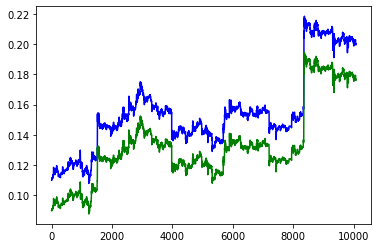

In [50]:
plt.plot(X_test.flatten(), color='blue')
plt.plot(predicted.flatten(), color='green')
plt.show()